In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [57]:
data=pd.read_csv("Final_data2.csv")

In [58]:
# selected_columns = ['Annual_Income', 'Num_Credit_Card', 'Num_of_Delayed_Payment',
#                    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
#                    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Credit_Score']

# data = data[selected_columns]


In [59]:
# data.to_csv("selected_columns.csv",index=False)

In [60]:
data.Credit_Score.value_counts()

1    53174
0    28998
2    17828
Name: Credit_Score, dtype: int64

# Resampling

In [61]:
from sklearn.utils import resample

In [62]:
#Separate the case of poor, standard and good
cs_poor= data[data.Credit_Score==0]
cs_standard=data[data.Credit_Score==1]
cs_good=data[data.Credit_Score==2]

In [63]:
#Upsample the good credit score
df_poor=resample(cs_poor,replace=True,n_samples=50000)
df_standard=resample(cs_standard,replace=True,n_samples=50000)
df_good=resample(cs_good,replace=True,n_samples=50000)

In [64]:
#combine majority class with upsampled minority class
new_data=pd.concat([df_poor,df_standard,df_good])

In [65]:
new_data.Credit_Score.value_counts()

0    50000
1    50000
2    50000
Name: Credit_Score, dtype: int64

In [66]:
#shuffling new data
from sklearn.utils import shuffle
new_data=shuffle(new_data)

In [67]:
new_data=shuffle(new_data)

In [68]:
#Split Input & Output Data
#X = df_train.drop('Credit_Score',axis=1)

X = new_data[['Annual_Income','Num_Credit_Card','Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age']]
y = new_data['Credit_Score']
print(X.shape)
print(y.shape)


(150000, 9)
(150000,)


In [69]:
#Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [70]:
#Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120000, 9)
(30000, 9)
(120000,)
(30000,)


In [71]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10000
           1       0.95      0.87      0.91     10000
           2       0.94      0.99      0.96     10000

    accuracy                           0.94     30000
   macro avg       0.94      0.94      0.94     30000
weighted avg       0.94      0.94      0.94     30000


---------------------------------------------



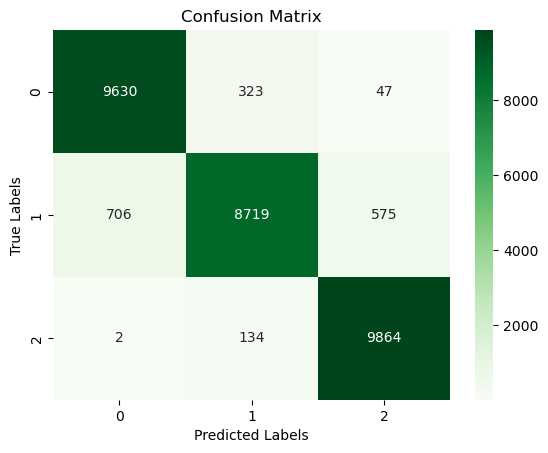

In [72]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

Feature: 0, Score: 0.10177
Feature: 1, Score: 0.05692
Feature: 2, Score: 0.07411
Feature: 3, Score: 0.10361
Feature: 4, Score: 0.08788
Feature: 5, Score: 0.13395
Feature: 6, Score: 0.19444
Feature: 7, Score: 0.09565
Feature: 8, Score: 0.15167


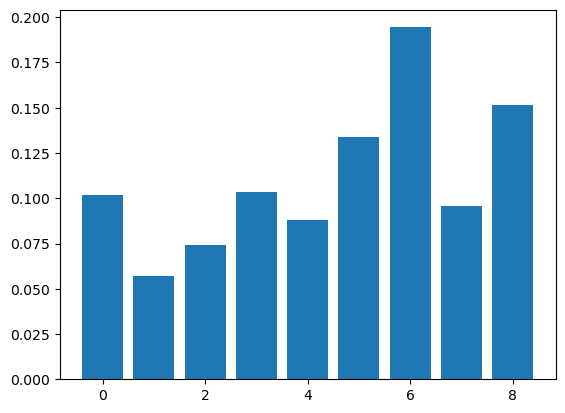

In [73]:
import matplotlib.pyplot as plt

importance = rf_classifier.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [74]:
y_pred = rf_classifier.predict([[20000,10,0,20,2,1,0,0,100]])
print(y_pred)

[0]


In [75]:
y_pred = rf_classifier.predict([[20000,10,0,20,2,0,0,0,100]])
print(y_pred)

[1]


In [79]:
y_pred = rf_classifier.predict([[19114.12,4,7,11.27,1,2,0,0,265]])
print(y_pred)

[0]


In [36]:
# import pickle
# pickle.dump(rf_classifier, open('Finalpkl.pkl', 'wb'))
# pickled_model = pickle.load(open('Finalpkl.pkl', 'rb'))

In [53]:
y_pred = rf_classifier.predict([[143162.64,5.0,6.0,31,3.0,2,0,38.37475294778511,300.0]])
print(y_pred)

[1]


In [17]:
# plt.figure(figsize=(12,10))
# sns.heatmap(data.columns.corr(), annot=True);
# plt.title("Figure")

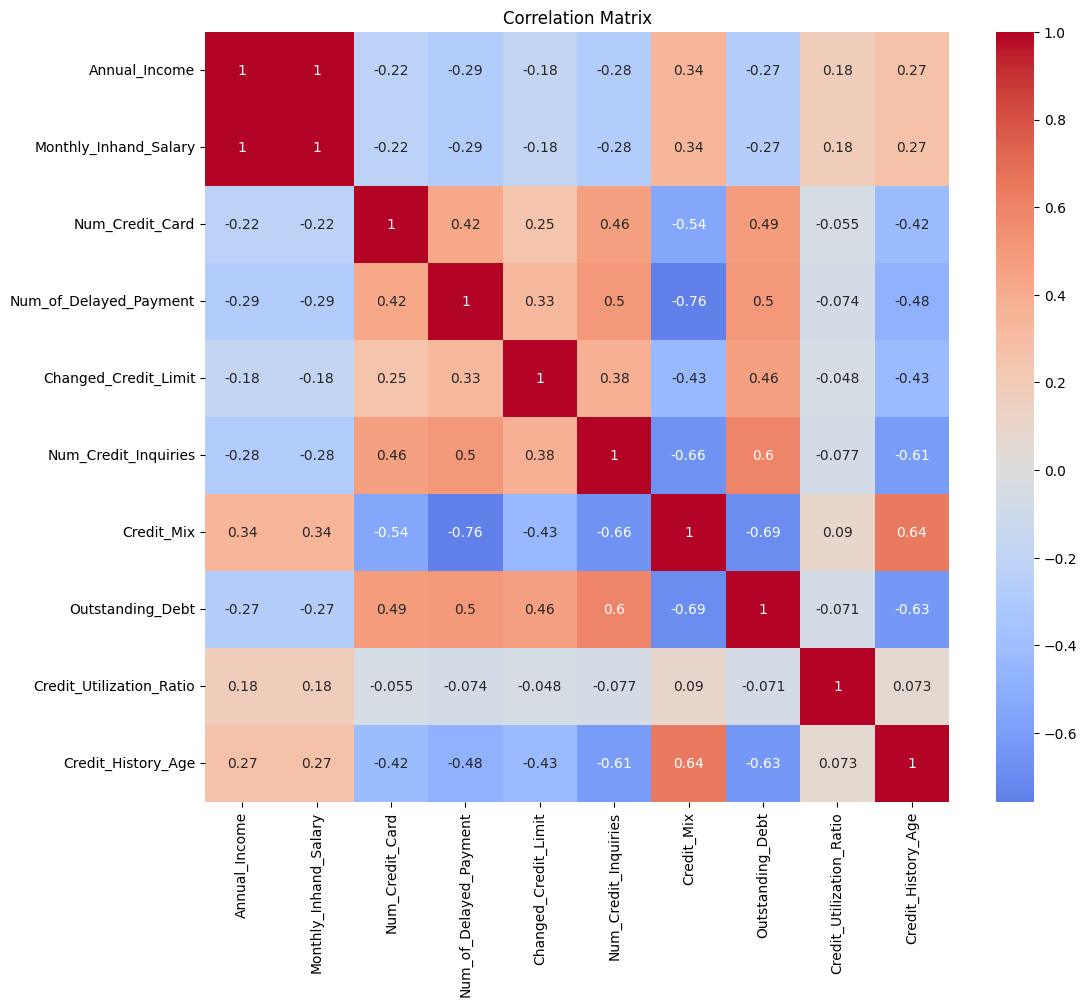

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the specified columns
columns = ['Annual_Income', 'Monthly_Inhand_Salary','Num_Credit_Card', 'Num_of_Delayed_Payment',
           'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
           'Credit_Utilization_Ratio', 'Credit_History_Age']
# columns=['Annual_Income', 'Monthly_Inhand_Salary',
#        'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
#        'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
#        'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
#        'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
#        'Payment_of_Min_Amount', 'Total_EMI_per_month',
#        'Amount_invested_monthly', 'Monthly_Balance',]

# Create a DataFrame with the specified columns
data = data[columns]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# List of classifiers to test
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    
    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Decision Tree
Average Accuracy: 0.8783
Average Precision: 0.8784
Average Recall: 0.8785
-----------------------
Classifier: Random Forest
Average Accuracy: 0.9098
Average Precision: 0.9101
Average Recall: 0.9099
-----------------------
Classifier: KNN
Average Accuracy: 0.7678
Average Precision: 0.7658
Average Recall: 0.7677
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.6750
Average Precision: 0.6798
Average Recall: 0.6750
-----------------------


# Decision tree

In [20]:
# from sklearn.tree import DecisionTreeClassifier
# clf_tree=DecisionTreeClassifier(criterion='gini',max_depth=2)
# clf_tree.fit(X_train,y_train)


In [21]:
# tree_pred = clf_tree.predict(X_test)
# evaluate_model(y_test, tree_pred)

In [22]:
# from sklearn.model_selection import GridSearchCV
# tunned_para=[{'criterion':['gini','entropy'],
#              'max_depth':range(2,10)}]
# clf_tree=DecisionTreeClassifier()
# clf=GridSearchCV(clf_tree,
#                 tunned_para,cv=10,
#                 scoring='roc_auc')
# clf.fit(X_train,y_train)

In [23]:
# clf.best_score_

In [24]:
#clf.best_params_

In [25]:
# import pandas as pd 
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# import matplotlib.pyplot as plt
# from sklearn.metrics import log_loss 
# import numpy as np 
# from sklearn.pipeline import Pipeline 

# SVC

In [26]:
# #linear
# svm = SVC(kernel='linear',probability=True,
#           random_state=23)
# kfold = StratifiedKFold(n_splits=5, shuffle=True,
#                         random_state=23)
# results = cross_val_score(svm, X, y, 
#                           scoring='neg_log_loss',
#                           cv=kfold)
# print(results.mean())

# #scaler = StandardScaler()
# scaler = MinMaxScaler()
# pipe = Pipeline([('SCL',scaler),('SVM',svm)])

# params = {'SVM__C':np.linspace(0.001, 5, 20)}
# gcv = GridSearchCV(pipe, param_grid=params,verbose=3,
#                    cv=kfold, scoring='neg_log_loss')
# gcv.fit(X, y)
# print(gcv.best_params_)
# print(gcv.best_score_)

In [27]:
# #Radial

# params = {'C':np.linspace(0.001, 5, 20),
#           'gamma':np.linspace(0.001, 5, 20)}
# svm = SVC(kernel='rbf',probability=True,
#           random_state=23)
# gcv = GridSearchCV(svm, param_grid=params,verbose=3,
#                    cv=kfold, scoring='neg_log_loss')
# gcv.fit(X, y)
# print(gcv.best_params_)
# print(gcv.best_score_)

In [28]:
# #polynomial

# params = {'C':np.linspace(0.001, 5, 20),
#           'degree':[2,3,4]}
# svm = SVC(kernel='poly',probability=True,
#           random_state=23)
# gcv = GridSearchCV(svm, param_grid=params,verbose=3,
#                    cv=kfold, scoring='neg_log_loss')
# gcv.fit(X, y)
# print(gcv.best_params_)
# print(gcv.best_score_)

In [2]:
import sklearn

print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.3.0


In [1]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.2/9.2 MB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.20.1 requires scikit-learn<1.3.0,>=0.24.0, but you have scikit-learn 1.3.0 which is incompatible.
